In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
Col_Data=pd.read_csv('recColumnData2.csv')
Col_Data

,ALF,AS,LRII,LRIC,Rho,CT,C,CRPa,CRPe,DLI,DLC,TRI,Failure
0,0.259740,2.181818,0.097150,0.1943,0.0179,7,DE,0.072727,0.072727,1.694933,1.694933,0.367347,Flexure
1,0.213998,2.181818,0.054207,0.1084,0.0179,7,DE,0.069091,0.069091,1.694933,1.694933,0.334973,Flexure
2,0.420020,2.181818,0.104867,0.2097,0.0179,4,DE,0.072727,0.072727,1.694933,1.694933,0.422964,Flexure
3,0.599965,2.181818,0.095496,0.1910,0.0179,4,DE,0.069091,0.069091,1.694933,1.694933,0.664159,Flexure
4,0.380032,4.000000,0.090983,0.1820,0.0151,4,DE,0.061250,0.061250,1.569087,1.569087,0.613656,Flexure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.027486,3.112500,0.064429,0.0966,0.0158,2,C,0.068750,0.068750,1.550964,1.550964,0.083306,Flexure
239,0.028608,3.112500,0.067059,0.1006,0.0158,2,C,0.068750,0.068750,1.550964,1.550964,0.086707,Flexure
240,0.029556,3.112500,0.069280,0.1039,0.0158,2,C,0.068750,0.068750,1.550964,1.550964,0.089580,Flexure
241,0.026664,3.112500,0.062503,0.0938,0.0158,2,C,0.068750,0.068750,1.550964,1.550964,0.080816,Flexure


### Using SMOTE (Synthetic Minority Oversampling Technique) to achieve oversampling

In [3]:
Col_Data.Failure.value_counts()

Flexure          191
Flexure-shear     34
Shear             18
Name: Failure, dtype: int64

In [4]:
pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
Col_Data.dtypes

ALF        float64
AS         float64
LRII       float64
LRIC       float64
Rho        float64
CT           int64
C           object
CRPa       float64
CRPe       float64
DLI        float64
DLC        float64
TRI        float64
Failure     object
dtype: object

In [14]:
#Revealing the number of missing data
Col_Data.isna().sum()

ALF        0
AS         0
LRII       0
LRIC       0
Rho        0
CT         0
C          0
CRPa       0
CRPe       0
DLI        0
DLC        0
TRI        0
Failure    0
dtype: int64

In [15]:
# We have to convert the data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Failure_N=le.fit_transform(Col_Data['Failure'])
C_N=le.fit_transform(Col_Data['C'])

#Adding the to the dataframe
Col_Data['Failure_N'], Col_Data['C']=Failure_N,C_N
Col_Data

,ALF,AS,LRII,LRIC,Rho,CT,C,CRPa,CRPe,DLI,DLC,TRI,Failure,Failure_N
0,0.259740,2.181818,0.097150,0.1943,0.0179,7,2,0.072727,0.072727,1.694933,1.694933,0.367347,Flexure,0
1,0.213998,2.181818,0.054207,0.1084,0.0179,7,2,0.069091,0.069091,1.694933,1.694933,0.334973,Flexure,0
2,0.420020,2.181818,0.104867,0.2097,0.0179,4,2,0.072727,0.072727,1.694933,1.694933,0.422964,Flexure,0
3,0.599965,2.181818,0.095496,0.1910,0.0179,4,2,0.069091,0.069091,1.694933,1.694933,0.664159,Flexure,0
4,0.380032,4.000000,0.090983,0.1820,0.0151,4,2,0.061250,0.061250,1.569087,1.569087,0.613656,Flexure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.027486,3.112500,0.064429,0.0966,0.0158,2,0,0.068750,0.068750,1.550964,1.550964,0.083306,Flexure,0
239,0.028608,3.112500,0.067059,0.1006,0.0158,2,0,0.068750,0.068750,1.550964,1.550964,0.086707,Flexure,0
240,0.029556,3.112500,0.069280,0.1039,0.0158,2,0,0.068750,0.068750,1.550964,1.550964,0.089580,Flexure,0
241,0.026664,3.112500,0.062503,0.0938,0.0158,2,0,0.068750,0.068750,1.550964,1.550964,0.080816,Flexure,0


In [16]:
from sklearn.model_selection import train_test_split
x=Col_Data.drop(['Failure','Failure_N'],axis=1)
y=Col_Data['Failure_N']

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [18]:
x_smote,y_smote=smote.fit_resample(x,y)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=10)

In [20]:
from collections import Counter
print('Before SMOTE:',Counter(y))
print('After SMOTE:',Counter(y_smote))

Before SMOTE: Counter({0: 191, 1: 34, 2: 18})
After SMOTE: Counter({0: 191, 2: 191, 1: 191})


### Training the model with SVM

In [21]:
from sklearn import svm
np.random.seed(42)
model=svm.SVC(probability=True)

In [22]:
model.fit(x_train,y_train)

SVC(probability=True)

### Evaluation by Score method

In [23]:
model.score(x_test,y_test)

0.7130434782608696

### Evaluation By Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(model,x,y,cv=5)
cross_val_score

array([0.79591837, 0.7755102 , 0.7755102 , 0.79166667, 0.45833333])

In [25]:
np.mean(cross_val_score)

0.7193877551020409

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(x_test)
conf_mat=confusion_matrix(y_test,y_preds)

In [27]:
#visualize the confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1,2
Actual Label,,,
0,26,4,11
1,0,27,12
2,0,6,29


In [28]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



## Package Plan ##

  environment location: /Users/elman/Documents/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       hecd8cb5_0         124 KB
    openssl-3.0.11             |       hca72f7f_2         4.5 MB
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following packages will be UPDATED:

  ca-certificates                     2023.05.30-hecd8cb5_0 --> 2023.08.22-hecd8cb5_0 
  openssl                

In [29]:
# Let's make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

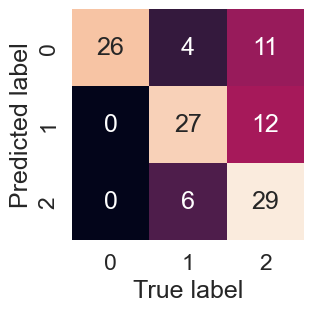

In [30]:
# creating a function for the confusion matrix
def plot_conf_mat(conf_mat):
    """plots a confusion matrix using seabor's heatmap()."""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,
                  #Annotate the boxes with conf_mat info,
                  cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');

plot_conf_mat(conf_mat)

In [31]:
len(x_test)

115

### Hyperparameter tuning

In [32]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Creating a new support vector machines model for hyperparameter tuning
This is going to be done by manually tweaking the hyperparameter values.

In [33]:
new_model=svm.SVC(probability=True,C=20,gamma=0.35)
new_model.fit(x_train,y_train)

SVC(C=20, gamma=0.35, probability=True)

In [34]:
new_model.score(x_test,y_test)

0.9565217391304348

In [35]:
y_preds=new_model.predict(x_test)
conf_mat2=confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1,2
Actual Label,,,
0,39,2,0
1,0,37,2
2,0,1,34


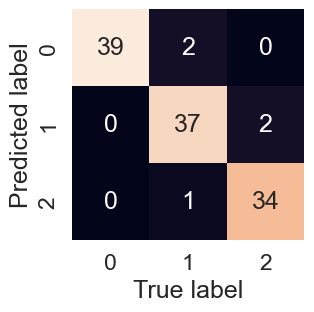

In [36]:
# creating a function for the confusion matrix
def plot_conf_mat(conf_mat2):
    """plots a confusion matrix using seabor's heatmap()."""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat2,annot=True,
                  #Annotate the boxes with conf_mat info,
                  cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');

plot_conf_mat(conf_mat2)

### Using GridSearchCV for the hyperparameter tuning
This automatically finds the best values for the chosen hyperparameters depending on the set range of hyperparameter values.

In [37]:
from sklearn.model_selection import GridSearchCV
parameters_dictionary={'kernel':['linear','rbf'],
                      'C':[0.0001,1,20],
                      'gamma':[0.1,4,10]}
new_model_2=svm.SVC()
grid_search=GridSearchCV(new_model_2,
                        parameters_dictionary,
                        scoring='f1_micro',
                        return_train_score=True,
                        cv=5,
                        verbose=2,
                        error_score='raise')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .................C=0.0001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.0001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.0001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.0001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .................C=0.0001, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.0001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.0001, gamma=4, kernel=linear; total time=   0.0s
[CV] END ...................C=0.0001, gamma=4, k

GridSearchCV(cv=5, error_score='raise', estimator=SVC(),
             param_grid={'C': [0.0001, 1, 20], 'gamma': [0.1, 4, 10],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='f1_micro', verbose=2)

In [38]:
best_model=grid_search.best_estimator_
best_parameters=grid_search.best_params_
best_f1=grid_search.best_score_

print('The best modelwas:',best_model)
print('The best parameter values were:',best_parameters)
print('The best f1-score was',best_f1)

The best modelwas: SVC(C=20, gamma=4)
The best parameter values were: {'C': 20, 'gamma': 4, 'kernel': 'rbf'}
The best f1-score was 0.9737935977066412


In [39]:
y_preds=new_model.predict(x_test)
conf_mat3=confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1,2
Actual Label,,,
0,39,2,0
1,0,37,2
2,0,1,34


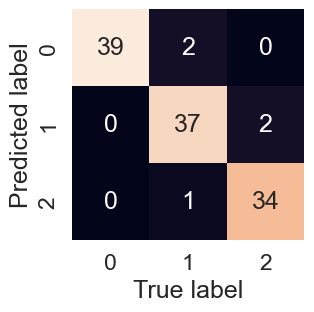

In [40]:
# creating a function for the confusion matrix
def plot_conf_mat(conf_mat3):
    """plots a confusion matrix using seabor's heatmap()."""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat3,annot=True,
                  #Annotate the boxes with conf_mat info,
                  cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');

plot_conf_mat(conf_mat3)

### Saving and loading model using the python pickle module


In [41]:
import pickle
pickle.dump(new_model_2,open('Failure_mode_prediction_model.pkl','wb'))